pbtest3: This notebook have focus on making a clasification machine learning model

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import ast  # Abstract Syntax Trees - safely parse string list to Python list
from reader import generic_reader
from inflation import read_cpi_by_year, convert_usd

In [2]:
cpi_by_year = read_cpi_by_year("inflation_data/cpiai.csv")

In [3]:
df_movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies.csv")
df_movies['release_date'] = pd.to_datetime(df_movies['release_date']) # Convert release_date into proper datetime objects
df_movies['genre_ids'] = df_movies['genre_ids'].apply(ast.literal_eval) # Turn genre_ids into actual Python list
df_movies['director_person_ids'] = df_movies['director_person_ids'].apply(ast.literal_eval) # Turn director_person_ids into actual Python list

Drop movies which are documentaries, or Animation Films or Short Films

In [4]:
df_movies = df_movies[df_movies["runtime"] >= 60]
print(len(df_movies))
df_movies = df_movies[~df_movies['genre_ids'].apply(lambda genre_id: 16 in genre_id or 99 in genre_id)]
len(df_movies)

24686


20497

In [5]:
# Drop movies where budget is zero
df_movies = df_movies[df_movies['budget'] != 0].copy()
len(df_movies)

6203

In [6]:
# # Drop all movies which does not have excatly one director
# df_movies = df_movies[df_movies['director_person_ids'].apply(lambda x: len(x) == 1)]
# df_movies['director'] = df_movies['director_person_ids'].apply(lambda x: x[0])

In [7]:
columns_to_keep = ['movie_id', 'original_title', 'release_date', 'budget', 'runtime', 'vote_average', 'vote_count', 'director_person_ids', 'genre_ids']
df_movies = df_movies[columns_to_keep].copy()
df_movies

,movie_id,original_title,release_date,budget,runtime,vote_average,vote_count,director_person_ids,genre_ids
11,19214,Passion of Mind,2000-01-07,12000000,105,5.800,42,[96972],"[18, 10749]"
18,17908,My Dog Skip,2000-01-12,6000000,95,6.700,280,[46297],"[35, 18, 10751]"
19,10471,Next Friday,2000-01-12,11000000,98,6.453,609,[52112],[35]
21,10384,Supernova,2000-01-14,90000000,91,4.940,409,"[1723, 62020]","[878, 27, 53]"
26,10213,From Dusk Till Dawn 3: The Hangman's Daughter,2000-01-18,5000000,94,4.900,369,[64190],"[37, 27, 53]"
...,...,...,...,...,...,...,...,...,...
27278,850165,The Iron Claw,2023-12-21,15900000,132,7.540,1088,[527607],"[36, 18]"
27279,1025491,Freud's Last Session,2023-12-22,10000000,109,6.659,145,[1496011],[18]
27281,994108,All of Us Strangers,2023-12-22,5000000,105,7.443,898,[586002],"[10749, 18, 14]"
27285,823452,The Boys in the Boat,2023-12-25,40000000,124,7.233,311,[1461],"[18, 36]"


In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6203 entries, 11 to 27286
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_id             6203 non-null   int64         
 1   original_title       6203 non-null   object        
 2   release_date         6203 non-null   datetime64[ns]
 3   budget               6203 non-null   int64         
 4   runtime              6203 non-null   int64         
 5   vote_average         6203 non-null   float64       
 6   vote_count           6203 non-null   int64         
 7   director_person_ids  6203 non-null   object        
 8   genre_ids            6203 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 484.6+ KB


In [9]:
df_movies.describe()

,movie_id,release_date,budget,runtime,vote_average,vote_count
count,6.203000e+03,6203,6.203000e+03,6203.000000,6203.000000,6203.000000
mean,1.902571e+05,2011-06-26 08:27:00.377236736,2.594306e+07,102.554087,5.836112,1808.984201
min,2.200000e+01,2000-01-07 00:00:00,1.000000e+00,60.000000,1.300000,10.000000
25%,1.509700e+04,2006-08-30 12:00:00,2.000000e+06,90.000000,5.200000,63.000000
50%,6.803400e+04,2011-06-06 00:00:00,1.000000e+07,99.000000,6.000000,442.000000
75%,3.262845e+05,2016-04-07 00:00:00,3.000000e+07,111.000000,6.600000,1943.500000
max,1.170469e+06,2023-12-25 00:00:00,5.839000e+08,608.000000,9.400000,38021.000000
std,2.299702e+05,NaN,4.191807e+07,18.849052,1.107895,3449.603902


array([[<Axes: title={'center': 'movie_id'}>,
        <Axes: title={'center': 'release_date'}>],
       [<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>]], dtype=object)

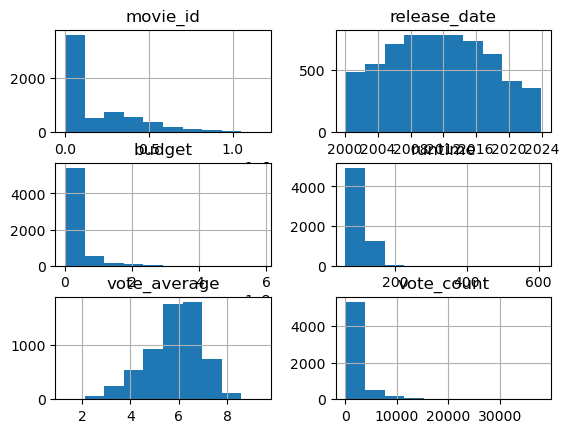

In [10]:
df_movies.hist()

Mention normal distribution of vote_average
Mention that most movies have a low budget, and most movies have a low vote_count

In [11]:
# Convert budget to 2023 USD
df_movies['budget_2023_usd'] = df_movies.apply(
    lambda row: convert_usd(
        original_amount=row['budget'],
        original_year=row['release_date'].year,
        new_year=2023,
        cpi_by_year=cpi_by_year
    ),
    axis=1
)
df_movies.sort_values(by="budget_2023_usd", ascending=False)

,movie_id,original_title,release_date,budget,runtime,vote_average,vote_count,director_person_ids,genre_ids,budget_2023_usd
25558,507086,Jurassic World Dominion,2022-06-01,583900000,147,6.634,6675,[930707],"[12, 28, 878]",607935300
9515,1865,Pirates of the Caribbean: On Stranger Tides,2011-05-15,379000000,136,6.561,14502,[17633],"[12, 28, 14]",513391695
22477,181812,Star Wars: The Rise of Skywalker,2019-12-18,416000000,142,6.300,10371,[15344],"[12, 28, 878]",495803565
14859,99861,Avengers: Age of Ultron,2015-04-22,365000000,141,7.271,23747,[12891],"[28, 12, 878]",469232494
5365,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,169,7.262,14944,[1704],"[12, 14, 28]",440867221
...,...,...,...,...,...,...,...,...,...,...
7129,123883,Ice Dreams,2009-01-23,1,120,6.400,21,[150971],"[10749, 10770, 18, 10751]",1
21031,571055,Down,2019-02-01,1,82,6.800,246,[120245],"[27, 53, 10770]",1
10638,221161,Devoured,2012-05-05,1,89,5.511,46,[147900],"[53, 27, 18]",1
7606,49970,Junkyard Dog,2009-08-09,1,91,4.100,11,[134878],"[27, 53]",1


In [12]:
# Define a function for rating_category
def get_rating_category(vote_average):
    if vote_average >= 7:
        return "good";
    if vote_average >= 5:
        return "ok";
    else:
        return "bad";
    
# # Define a function for rating_category
# def get_rating_category(vote_average):
#     if vote_average >= 6:
#         return "good";
#     else:
#         return "bad";

# Apply the function to df_movies 
df_movies['rating_category'] = df_movies['vote_average'].apply(get_rating_category)
df_movies.sort_values(by="vote_average", ascending=False)

,movie_id,original_title,release_date,budget,runtime,vote_average,vote_count,director_person_ids,genre_ids,budget_2023_usd,rating_category
10614,246895,Complacent,2012-05-01,500000,104,9.400,14,[88039],[18],663566,good
16060,631303,The Devil's Hour,2016-02-02,115000,119,8.900,14,[2411023],"[27, 18, 53]",145998,good
6496,155,The Dark Knight,2008-07-16,185000000,152,8.523,34473,[525],"[18, 28, 80, 53]",261816713,good
14232,157336,Interstellar,2014-11-05,165000000,169,8.500,37950,[525],"[12, 18, 878]",212370429,good
20478,554386,Evanescence: Synthesis Live,2018-10-12,100000,88,8.500,68,[1108767],[10402],121343,good
...,...,...,...,...,...,...,...,...,...,...,...
9192,118332,Total Retribution,2011-02-02,1500000,84,1.800,13,[98360],"[27, 878, 53]",2031893,bad
14272,295884,Saving Christmas,2014-11-14,500000,79,1.800,96,[99388],"[35, 14]",643547,bad
213,203023,Witchcraft XI: Sisters in Blood,2000-05-09,40,90,1.700,11,[98712],[27],71,bad
23882,810511,2025: The World Enslaved by a Virus,2021-01-15,10000,91,1.671,35,"[3025333, 3025334]","[12, 878, 53, 14]",11245,bad


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
os.environ["PATH"] += r";C:\Program Files\Graphviz\bin"
import graphviz

# Initialize binarizer
mlb = MultiLabelBinarizer()

# Multi-hot encode genre_ids
genre_encoded = mlb.fit_transform(df_movies['genre_ids'])
# Create a DataFrame for the multi-hot columns
genre_df = pd.DataFrame(genre_encoded, columns=[f"genre_{g}" for g in mlb.classes_],index=df_movies.index)
print(len(genre_df))

# Combine with your original features
df_movies = pd.concat([df_movies, genre_df], axis=1)
len(df_movies)



6203


6203

In [14]:
# Encode target variable
le_rating = LabelEncoder()
df_movies['rating_encoded'] = le_rating.fit_transform(df_movies['rating_category'])


# Independent variables (X) and dependent variable (y)
X = df_movies[['budget_2023_usd', 'runtime'] + list(genre_df.columns)]
y = df_movies['rating_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

# Train model
model = DecisionTreeClassifier(max_depth=4)
# model = RandomForestClassifier(class_weight='balanced')
# model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=le_rating.classes_))

              precision    recall  f1-score   support

         bad       0.61      0.47      0.53       323
        good       0.63      0.26      0.36       196
          ok       0.74      0.88      0.81      1032

    accuracy                           0.72      1551
   macro avg       0.66      0.53      0.57      1551
weighted avg       0.70      0.72      0.69      1551



In [15]:
# draw tree from the trained data by graphviz package
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=['budget_2023_usd', 'runtime']+ list(genre_df.columns),
                                class_names=le_rating.classes_,  
                                filled=True,
                                rounded=True) 

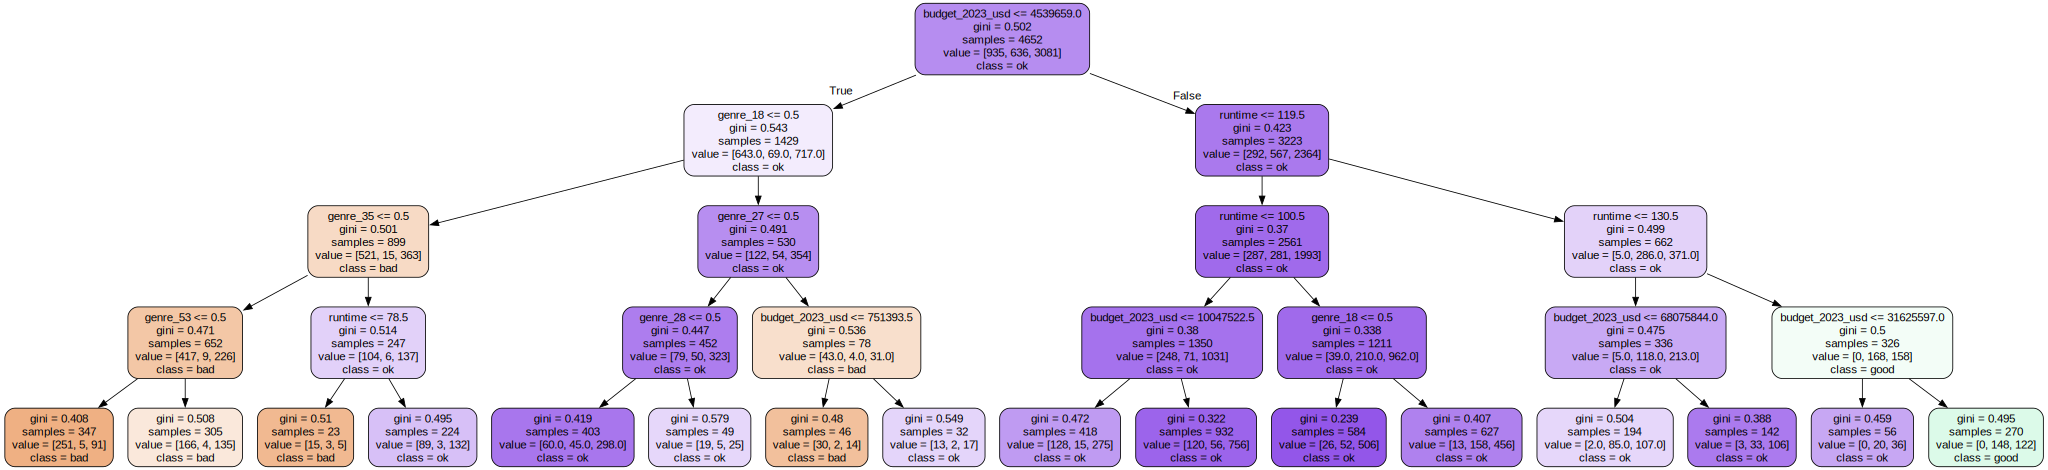

In [16]:
graph = graphviz.Source(dot_data)
graph

Model validation

In [17]:
# # Set the metrics
# scoring = 'accuracy'

In [18]:
# Predict the ratings of the test data
y_testp = model.predict(X_test)
y_testp

array([2, 2, 2, ..., 2, 0, 2])

In [19]:
y_test

22788    2
10904    2
4886     2
14426    1
9966     2
        ..
9097     1
13805    0
26300    1
20546    2
7687     2
Name: rating_encoded, Length: 1551, dtype: int64

In [20]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.7156673114119922


In [21]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[151,   0, 172],
       [  4,  50, 142],
       [ 94,  29, 909]])

In [22]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,0,1,2
rating_encoded,,,
0,151,0,172
1,4,50,142
2,94,29,909
